1) Clone https://github.com/adamnguyenitvn/UIT_bigdata_labs_2019

2) Open *.ipynb

3) Make a copy of *.ipynb, name it with your studentID_*.ipynb

4) Do the exercise

5) Write your github username here http://socrates.io/#hFiGynu . We will add you to the repos for push permission

6) Check your email for github invitation

7) Push your Jupyter notebook to github

Note that you should use Python 3 for all exercises.

# Introducing Pandas

Pandas is a Python library that makes handling tabular data easier. Since we're doing data science - this is something we'll use from time to time!

It's one of three libraries you'll encounter repeatedly in the field of data science:

## Pandas
Introduces "Data Frames" and "Series" that allow you to slice and dice rows and columns of information.

## NumPy
Usually you'll encounter "NumPy arrays", which are multi-dimensional array objects. It is easy to create a Pandas DataFrame from a NumPy array, and Pandas DataFrames can be cast as NumPy arrays. NumPy arrays are mainly important because of...

Do the following exercise.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("PastHires.csv")

df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:

In [2]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


You can also view the end of your data with tail():

In [4]:
df.tail(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
11,4,Y,1,BS,N,Y,Y
12,0,N,0,PhD,Y,N,Y


We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 13 rows with 7 columns per row:

In [4]:
df.shape

(13, 7)

The total size of the data frame is the rows * columns:

In [5]:
df.size

91

The len() function gives you the number of rows in a DataFrame:

In [6]:
len(df)

13

If your DataFrame has named columns (in our case, extracted automatically from the first row of a .csv file,) you can get an array of them back:

In [7]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [8]:
df['Hired']

0     Y
1     Y
2     N
3     Y
4     N
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object

You can also extract a given range of rows from a named column, like so:

In [9]:
df['Hired'][:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Hired, dtype: object

Or even extract a single value from a specified column / row combination:

In [10]:
df['Hired'][5]

'Y'

To extract more than one column, you pass in a list of column names instead of a single one:

In [11]:
df[['Years Experience', 'Hired']]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N
5,0,Y
6,5,Y
7,3,Y
8,15,Y
9,0,N


You can also extract specific ranges of rows from more than one column, in the way you'd expect:

In [12]:
df[['Years Experience', 'Hired']][:5]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N


Sorting your DataFrame by a specific column looks like this:

In [13]:
df.sort_values(['Years Experience'])

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [7]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

Pandas even makes it easy to plot a Series or DataFrame - just call plot():

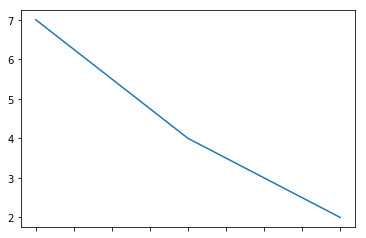

In [9]:
degree_counts.plot(kind='line')

## Exercise

Try extracting rows 5-10 of our DataFrame, preserving only the "Previous Employers" and "Hired" columns. Assign that to a new DataFrame, and create a histogram plotting the distribution of the previous employers in this subset of the data.

In [23]:
test = df[['Previous employers', 'Hired']][4:9]


In [26]:
test.head()

,Previous employers,Hired
4,2,N
5,0,Y
6,2,Y
7,1,Y
8,5,Y


In [27]:
testDegree_counts = test['Previous employers'].value_counts()
testDegree_counts

2    2
5    1
1    1
0    1
Name: Previous employers, dtype: int64

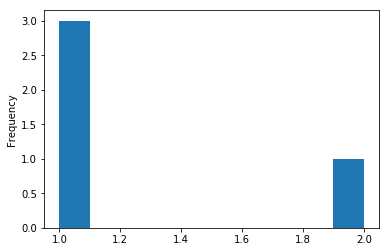

In [31]:
testDegree_counts.plot('hist')

## Series

In [35]:
import numpy as np
import pandas as pd

In [36]:
labels = ['a', 'b', 'c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10, 'b':20, 'c':30}

In [37]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [38]:
pd.Series(data = my_list, index = labels)

a    10
b    20
c    30
dtype: int64

In [39]:
pd.Series(my_list, labels)

a    10
b    20
c    30
dtype: int64

## NumPy Arrays

In [40]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [41]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

## Dictionary

In [42]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

## Data in series

In [43]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [44]:
pd.Series([sum, print, len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an index

In [45]:
ser1 = pd.Series([1,2,3,4], index = ['USA', 'Gernamy', 'USSR', 'Japan'])
ser1

USA        1
Gernamy    2
USSR       3
Japan      4
dtype: int64

In [50]:
ser2 = pd.Series([1,2,5,4], index = ['USA', 'Gernamy', 'Italy', 'Japan'])
ser2

USA        1
Gernamy    2
Italy      5
Japan      4
dtype: int64

In [48]:
ser1['USSR']

3

In [51]:
ser1 + ser2


Gernamy    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

## DataFrames

In [53]:
from numpy.random import randn
np.random.seed(101)

In [54]:
df = pd.DataFrame(randn(5,4), index='A B C D E'.split(),columns='W X Y Z'.split())

In [55]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

In [56]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [58]:
df[['W', 'Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [59]:
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [60]:
type(df['W'])

pandas.core.series.Series

Creating a new column

In [70]:
df['new'] = df['W'] + df['Y']
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


Removing columns

In [63]:
df.drop('new', axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [64]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [71]:
df.drop('new', axis=1, inplace=True)

In [72]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [73]:
df.drop('E', axis = 0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [74]:
df.drop('E', axis = 0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [75]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [76]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [77]:
df.loc['B', 'Y']

-0.8480769834036315

In [78]:
df.loc[['A', 'B'], ['W', 'Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


# Conditional Selection

In [79]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [80]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [81]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [82]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [83]:
df[df['W']>0][['Y', 'X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


In [84]:
df[(df['W']>0) & (df['Y']>1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


# More Index Details

In [85]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [86]:
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [87]:
newind = 'CA NY WY OR CO'.split()

In [88]:
df['States'] = newind

In [89]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [90]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [91]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [92]:
df.set_index('States', inplace=True)

In [93]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


# Muti-Index and Index Hierarchy

In [94]:
outside = ['G1', 'G1', 'G1', 'G2', 'G2', 'G2']

In [95]:
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [96]:
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [99]:
df = pd.DataFrame(np.random.randn(6,2), index = hier_index, columns=['A', 'B'])
df

A         B
G1 1 -0.497104 -0.754070
   2 -0.943406  0.484752
   3 -0.116773  1.901755
G2 1  0.238127  1.996652
   2 -0.993263  0.196800
   3 -1.136645  0.000366

In [100]:
df.loc['G1']

,A,B
1,-0.497104,-0.754070
2,-0.943406,0.484752
3,-0.116773,1.901755


In [101]:
df.loc['G1'].loc[1]

A   -0.497104
B   -0.754070
Name: 1, dtype: float64

In [102]:
df.index.names

FrozenList([None, None])

In [103]:
df.index.names = ['Group', 'Num']

In [104]:
df

A         B
Group Num                    
G1    1   -0.497104 -0.754070
      2   -0.943406  0.484752
      3   -0.116773  1.901755
G2    1    0.238127  1.996652
      2   -0.993263  0.196800
      3   -1.136645  0.000366

In [105]:
df.xs('G1')

,A,B
Num,,
1,-0.497104,-0.754070
2,-0.943406,0.484752
3,-0.116773,1.901755


In [106]:
df.xs(['G1', 1])

A   -0.497104
B   -0.754070
Name: (G1, 1), dtype: float64

In [107]:
df.xs(1,level='Num')

,A,B
Group,,
G1,-0.497104,-0.754070
G2,0.238127,1.996652


## Missing Data

In [108]:
import numpy as np
import pandas as pd

In [109]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1,2,3]})

In [110]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [111]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [115]:
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [118]:
df.dropna(thresh = 3)

,A,B,C
0,1.0,5.0,1


In [119]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [120]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## GroupBy

In [124]:
import pandas as pd
#create data frame
data = {'Company': ['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
       'Person': ['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
       'Sales': [200, 120, 340, 124, 243, 350]}

In [125]:
df = pd.DataFrame(data)

In [127]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [128]:
df.groupby('Company')

In [129]:
by_comp = df.groupby("Company")

In [130]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [131]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [132]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [133]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [134]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [135]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [136]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [137]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [138]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

## 6. Merging, Joining and Concatenating

In [139]:
import pandas as pd

In [140]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3'],
                   'C': ['C0', 'C1', 'C2', 'C3'],
                   'D': ['D0', 'D1', 'D2', 'D3']},
                  index = [0,1,2,3])

In [143]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                   'B': ['B4', 'B5', 'B6', 'B7'],
                   'C': ['C4', 'C5', 'C6', 'C7'],
                   'D': ['D4', 'D5', 'D6', 'D7']},
                   index = [4,5,6,7])

In [144]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                   'B': ['B8', 'B9', 'B10', 'B11'],
                   'C': ['C8', 'C9', 'C10', 'C11'],
                   'D': ['D8', 'D9', 'D10', 'D11']},
                   index = [8,9,10,11])

In [145]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [146]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [147]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [148]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [149]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


# merging

In [151]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']})

In [152]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [153]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [154]:
pd.merge(left, right, how='inner', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [155]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']})

In [156]:
pd.merge(left, right, on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [158]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


In [159]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


In [160]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


# Joining

In [161]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']},
                   index = ['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                     'D': ['D0', 'D2', 'D3']},
                    index = ['K0', 'K2', 'K3'])

In [162]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [163]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## 7. Operations

In [164]:
import pandas as pd
df = pd.DataFrame({'col1': [1,2,3,4], 'col2':[444,555,666,444], 'col3':['abc', 'def', 'ghi', 'xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [165]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [166]:
df['col2'].nunique()

3

In [168]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [169]:
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [170]:
newdf

,col1,col2,col3
3,4,444,xyz


In [171]:
def times2(x):
    return x*2

In [172]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [173]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [174]:
df['col1'].sum()

10

In [175]:
del df['col1']

In [176]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [177]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [178]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [179]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [180]:
df.sort_values(by='col2')

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


In [181]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [182]:
# drop rows with NaN values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [183]:
import numpy as np


In [184]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                  'col2':[np.nan,555,666,444],
                  'col3':['abc', 'def', 'ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [185]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


In [186]:
df.dropna()

,col1,col2,col3
1,2.0,555.0,def
2,3.0,666.0,ghi


In [187]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [188]:
data = {'A':['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
       'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}
df=pd.DataFrame(data)

In [189]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [190]:
df.pivot_table(values='D', index=['A', 'B'], columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

## 8.Data input and output

In [191]:
import numpy as np
import pandas as pd

In [192]:
df=pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [193]:
df.to_csv('example.csv', index=False)

In [194]:
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [198]:
pd.read_excel('Excel_Sample.xlsx', sheetname='Sheet1')

C:\Users\quan1\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [197]:
df.to_excel('Excel_Sample.xlsx', sheet_name='Sheet1')

# SQL

In [199]:
from sqlalchemy import create_engine

In [203]:
engine = create_engine('sqlite:///:memory:')

In [204]:
df.to_sql('data', engine)

In [205]:
sql_df = pd.read_sql('data', con=engine)

In [206]:
sql_df

,index,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15
